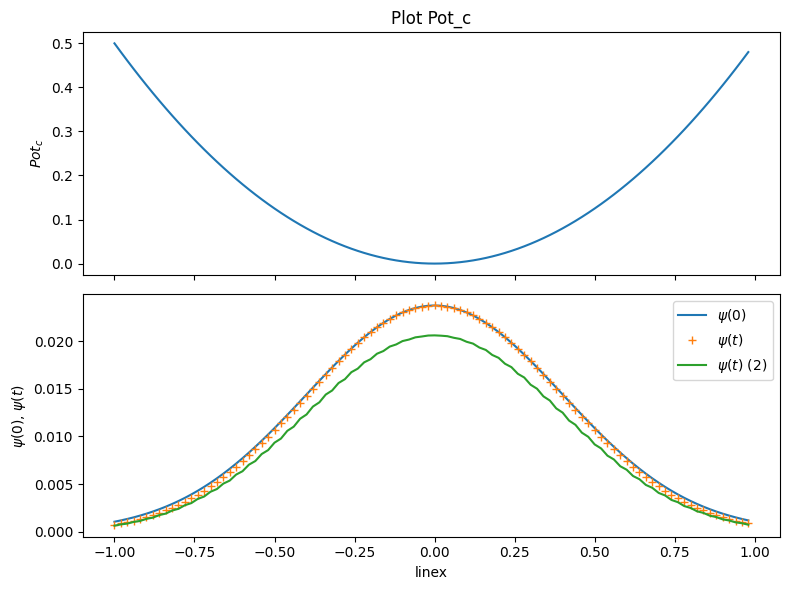

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math

n=100
l=1
tau=0.5*np.pi
ka=1

h=(l-(-l))/n
w=1/(2*np.pi*h)

linex=[]
psi0_c=[]
psit_c=[]
#psit2_c=[]
Pot_c=[]
x0=-l

for i in range(0,(n)):
    xi=x0+i*h
    psi0_r=math.sqrt(math.sqrt(1/(np.pi*20*h*20*h)))*math.exp(-(xi-(0))**2/(2*20*h*20*h))
    psi0c=complex(psi0_r,0)
    psi0_c.append(psi0c)
    linex.append(xi)    
    pot_r=(0.5)*ka*xi**2
    Pot_c.append(pot_r)
    #print((linex[i],psi0_c[i]),Pot_c[i])

sumN=np.absolute(np.vdot(psi0_c,psi0_c))
psi0_cN=psi0_c/sumN

for k in range(0,(n)):
    cv=np.cos(Pot_c[k]*tau)
    sv=np.sin(Pot_c[k]*tau)
    H0c=complex(cv,sv)
    psit_k=H0c*psi0_cN[k]
    psit_c.append(psit_k)

Na=int(n/2)
psit2_c=np.zeros(n, dtype=np.complex_)
ct=np.cos(-w*tau)
st=np.sin(-w*tau)
ct_c=complex(ct,0)
st_c=complex(0,st)
M2=np.zeros((2,2),dtype=np.complex_)
M2[0,0]=ct
M2[0,1]=-1*st
M2[1,0]=-1*st
M2[1,1]=ct
psi_in=np.zeros(2, dtype=np.complex_)
psi_o=np.zeros(2)
# print(len(psit_c), len(Pot_c), M2, len(psit2_c), print(psi_o))

#---Below are the first block of matrix multiplication between initial wave----
#---function (psi_o) and matrix block of H0 -----------------------------------

for i in range(0,(n), 2):
    psit2_k=ct_c*psit_c[i]-st_c*psit_c[i+1]
    psit2_k1=st_c*psit_c[i]+ct_c*psit_c[i+1]
    psit2_c[i] = (psit2_k)
    psit2_c[i+1] = (psit2_k1)
    # print(i, psit2_c[i], psit2_k, psit2_c[i+1], psit2_k1)
    psi_in[0]=psit_c[i]
    psi_in[1]=psit_c[i+1]
    psi_o=np.matmul(M2,psi_in)
    psit2_c[i]=psi_o[0]
    psit2_c[i+1]=psi_o[1]
    # print(linex[i],psit2_c[i])

for i in range(0,(n), 2):
    psi_in[0]=psit2_c[i]
    psi_in[1]=psit2_c[i+1]
    psi_o=np.matmul(M2,psi_in)
    psit2_c[i]=psi_o[0]
    psit2_c[i+1]=psi_o[1]

#for i in range(0,(n+1)):
 # print(linex[i],psit2_c[i])
# Membuat subplot
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

# Plot pertama untuk Pot_c
axs[0].plot(linex, Pot_c)
axs[0].set_ylabel("$Pot_c$")
axs[0].set_title("Plot Pot_c")

# Plot kedua untuk psi0_cN, psit_c, dan psit2_c
axs[1].plot(linex, psi0_cN)
axs[1].plot(linex, psit_c, '+')
axs[1].plot(linex, psit2_c, '-')
axs[1].set_ylabel("$\psi(0)$, $\psi(t)$")
axs[1].set_xlabel("linex")
axs[1].legend(["$\psi(0)$", "$\psi(t)$", "$\psi(t)$ (2)"], loc='best')

# Menampilkan plot
plt.tight_layout()
plt.show()
